# YouTube Trends

导入所需要的包

In [1]:
#-*- coding:utf-8 –*-#
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns 

导入数据

In [2]:
data = pd.DataFrame()
for reg in ['CA', 'DE', 'FR', 'GB','US']:
    df = pd.read_csv(r'./{reg}videos.csv'.format(reg=reg))
    df['country'] = reg
    data = pd.concat([df, data], ignore_index=True )
data.info()
print("缺失数据及个数：\n",data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202310 entries, 0 to 202309
Data columns (total 17 columns):
video_id                  202310 non-null object
trending_date             202310 non-null object
title                     202310 non-null object
channel_title             202310 non-null object
category_id               202310 non-null int64
publish_time              202310 non-null object
tags                      202310 non-null object
views                     202310 non-null int64
likes                     202310 non-null int64
dislikes                  202310 non-null int64
comment_count             202310 non-null int64
thumbnail_link            202310 non-null object
comments_disabled         202310 non-null bool
ratings_disabled          202310 non-null bool
video_error_or_removed    202310 non-null bool
description               195368 non-null object
country                   202310 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 22.2+ MB
缺失数据及个数

数据中包含五个数值属性category_id，views，likes,dislikes和comment_count，其余均为标称属性
## 数值数型（五数概括及可视化）

In [3]:
#五数概括
data.describe()

,category_id,views,likes,dislikes,comment_count
count,202310.000000,2.023100e+05,2.023100e+05,2.023100e+05,2.023100e+05
mean,19.712412,2.053181e+06,5.682284e+04,3.067639e+03,6.177626e+03
std,7.359156,9.412473e+06,2.078183e+05,2.859958e+04,3.145332e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,7.517425e+04,1.447000e+03,6.700000e+01,2.090000e+02
50%,23.000000,3.091290e+05,7.603000e+03,2.900000e+02,9.240000e+02
75%,24.000000,1.103690e+06,3.224475e+04,1.152000e+03,3.520000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


## views

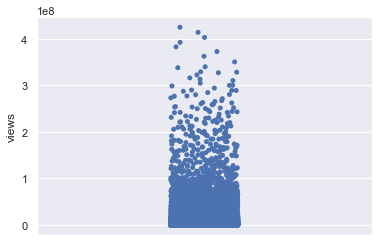

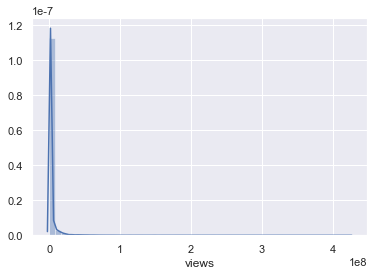

In [4]:
plt.figure()
sns.set(style="darkgrid")
sns.stripplot(y='views',data=data)
plt.figure()
sns.distplot(data.views.dropna())

## likes

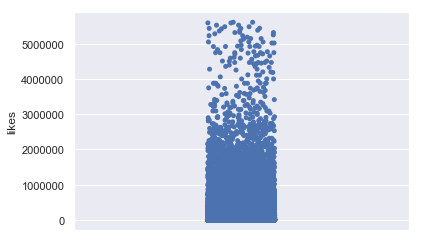

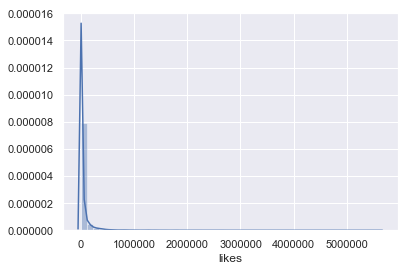

In [5]:
plt.figure()
sns.set(style="darkgrid")
sns.stripplot(y='likes',data=data)
plt.figure()
sns.distplot(data.likes.dropna())

## dislikes

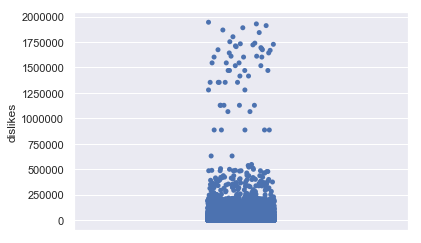

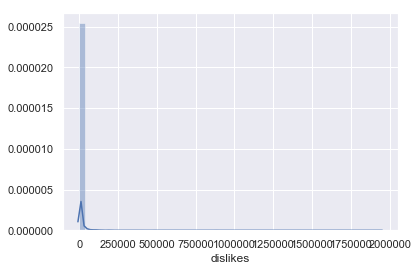

In [6]:
plt.figure()
sns.set(style="darkgrid")
sns.stripplot(y='dislikes',data=data)
plt.figure()
sns.distplot(data.dislikes.dropna())

## comment_count

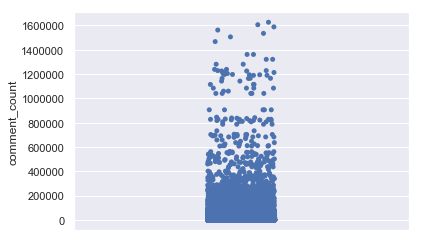

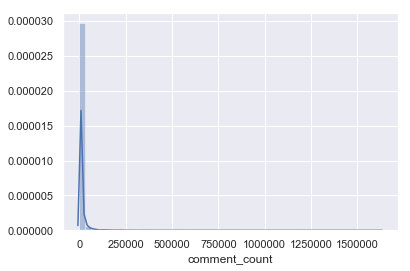

In [7]:
plt.figure()
sns.set(style="darkgrid")
sns.stripplot(y='comment_count',data=data)
plt.figure()
sns.distplot(data.comment_count.dropna())

## likes, dislikes之间的关联

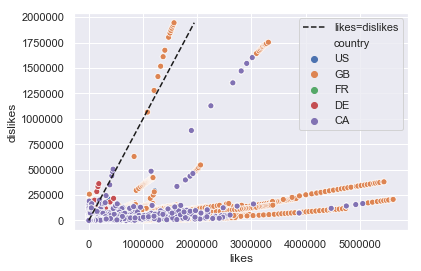

In [8]:
sns.scatterplot(x='likes',y='dislikes',data=data,hue='country')
x=list(range(0,max(data.dislikes)))
plt.plot(x,x,label='likes=dislikes',color='k',linestyle='--')
plt.legend()

## likes, comment_count之间的关联

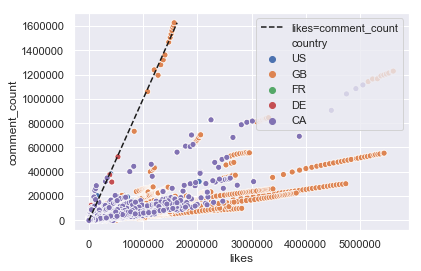

In [9]:
sns.scatterplot(x='likes',y='comment_count',data=data,hue='country')
x=list(range(0,max(data.comment_count)))
plt.plot(x,x,label='likes=comment_count',color='k',linestyle='--')
plt.legend()

# 标称属性
输出标称属性的频数，词条太多在此处仅展示每个标称属性的前15项

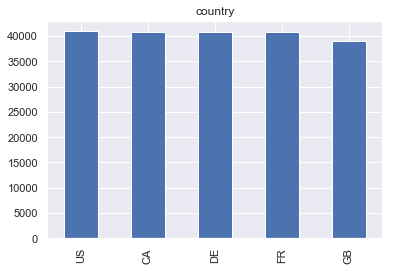

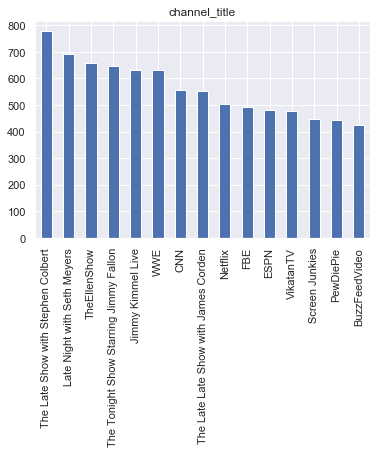

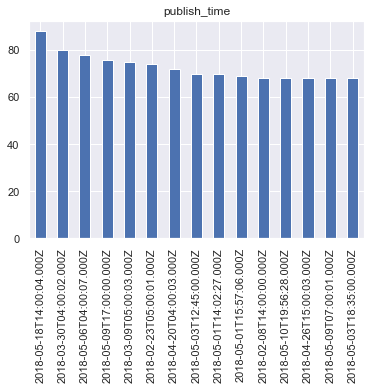

In [10]:
plt.figure()
data['country'].value_counts()[0:15].plot.bar(title='country')
plt.figure()
data['channel_title'].value_counts()[0:15].plot.bar(title='channel_title')
plt.figure()
data['publish_time'].value_counts()[0:15].plot.bar(title='publish_time')

# 数据缺失的处理
通过上面对数据缺失的检查发现，本数据集只有description有缺数数据，由于description部分为数据的描述部分，无法使用相似性、高频率值以及相关关系来填补，故在此只将缺失部分剔除做观察。              
## 将缺失部分剔除

In [11]:
data1=data.copy(deep=True)
data1=data1.dropna() #删除包含空值的所有行
data1.info()
print(data1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195368 entries, 0 to 202309
Data columns (total 17 columns):
video_id                  195368 non-null object
trending_date             195368 non-null object
title                     195368 non-null object
channel_title             195368 non-null object
category_id               195368 non-null int64
publish_time              195368 non-null object
tags                      195368 non-null object
views                     195368 non-null int64
likes                     195368 non-null int64
dislikes                  195368 non-null int64
comment_count             195368 non-null int64
thumbnail_link            195368 non-null object
comments_disabled         195368 non-null bool
ratings_disabled          195368 non-null bool
video_error_or_removed    195368 non-null bool
description               195368 non-null object
country                   195368 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 22.9+ MB
video_i

## 数据对比

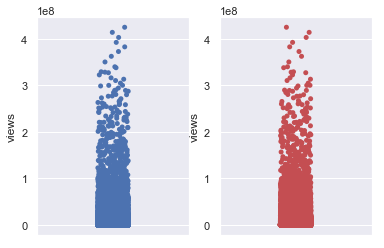

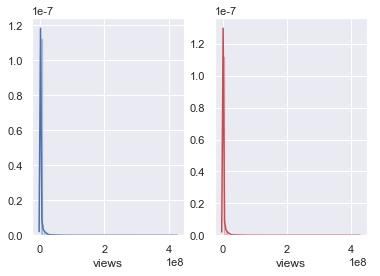

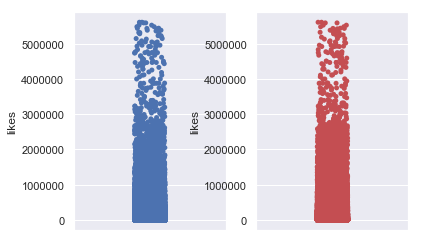

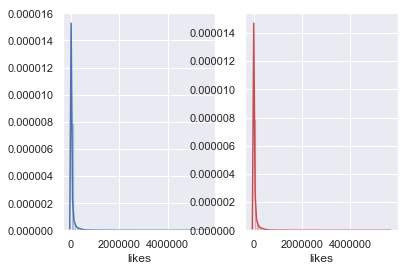

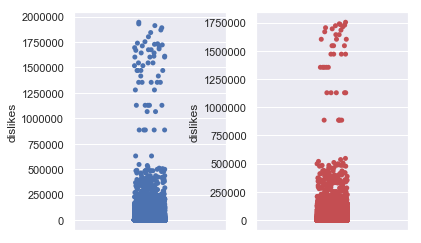

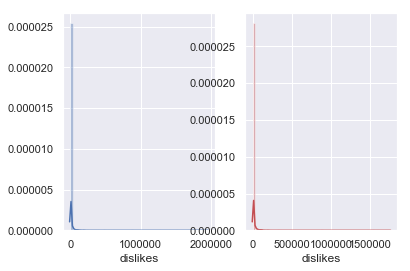

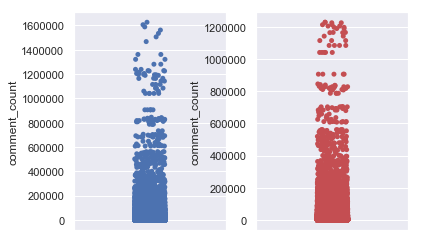

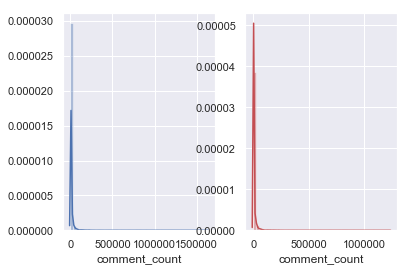

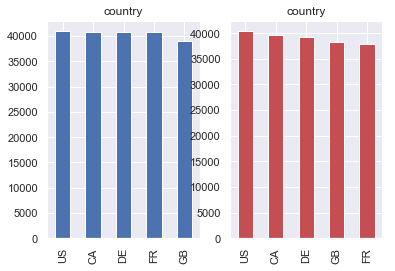

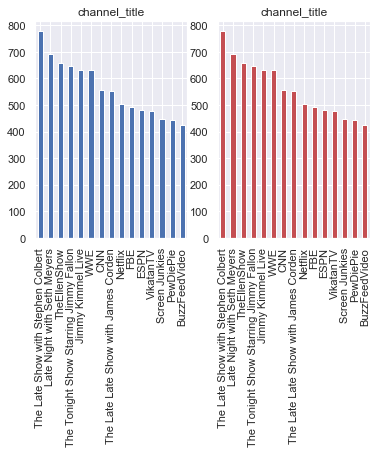

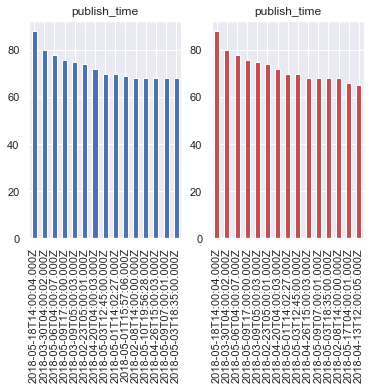

In [12]:
plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.stripplot(y='views',data=data)
plt.subplot(122)
sns.set(style="darkgrid")
sns.stripplot(y='views',data=data1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(data.views.dropna())
plt.subplot(122)
sns.distplot(data1.views.dropna(),color='r')

plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.stripplot(y='likes',data=data)
plt.subplot(122)
sns.set(style="darkgrid")
sns.stripplot(y='likes',data=data1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(data.likes.dropna())
plt.subplot(122)
sns.distplot(data1.likes.dropna(),color='r')
             
plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.stripplot(y='dislikes',data=data)
plt.subplot(122)
sns.set(style="darkgrid")
sns.stripplot(y='dislikes',data=data1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(data.dislikes.dropna())
plt.subplot(122)
sns.distplot(data1.dislikes.dropna(),color='r')

plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.stripplot(y='comment_count',data=data)
plt.subplot(122)
sns.set(style="darkgrid")
sns.stripplot(y='comment_count',data=data1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(data.comment_count.dropna())
plt.subplot(122)
sns.distplot(data1.comment_count.dropna(),color='r')
             
plt.figure()
plt.subplot(121)
data['country'].value_counts()[0:15].plot.bar(title='country')
plt.subplot(122)
data1['country'].value_counts()[0:15].plot.bar(title='country',color='r')
plt.figure()
plt.subplot(121)
data['channel_title'].value_counts()[0:15].plot.bar(title='channel_title')
plt.subplot(122)
data1['channel_title'].value_counts()[0:15].plot.bar(title='channel_title',color='r')
plt.figure()
plt.subplot(121)
data['publish_time'].value_counts()[0:15].plot.bar(title='publish_time')
plt.subplot(122)
data1['publish_time'].value_counts()[0:15].plot.bar(title='publish_time',color='r')